# Mechanism Diagnosis at learning snapshot (e.g. 100 trials)

Alana Jaskir <br>
Brown University, Providence, RI, USA <br>
Laboratory for Neural Computation and Cognition <br>
Michael Frank <br>

Act, G, and N values over range of probability levels and values of rho
after 100 trials of learning <br>

Figure 2

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import importlib
from sklearn import metrics
import pickle

import os
import sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

# my models
from opal import OpAL
import learning
import plot_dynamics

# data directory
path = "../sims/results/anneal_100/complexity_500_5000/opt_res/"
sys.path.insert(1, os.path.join(sys.path[0], path))

path2 = "../standard_rl/"
sys.path.insert(1, os.path.join(sys.path[0], path2))
import rl
from rl import RL
import learn
import diagnosis

In [2]:
importlib.reload(learning)
importlib.reload(plot_dynamics)
importlib.reload(diagnosis)

<module 'diagnosis' from '/Users/ajaskir/Desktop/Projects/FYP/code/opal/notebooks/diagnosis.py'>

# Bayes Annealing

In [ ]:
importlib.reload(diagnosis)
# matplotlib.rcParams['figure.dpi'] = 500
# plot
fig, ax = plt.subplots(figsize=(7, 5))   # go actor evolution
fig2, ax2 = plt.subplots(figsize=(5, 7)) # rho2
axs = [0,ax2]
prange = np.round(np.arange(0.1,0.91,.1),decimals=1)  # ranges to plot
diagnosis.gna(opal_SACrit_BayesAnneal,prange,250,0,ax,plot_act=True,axs=axs)
# ax1.set_ylabel("Act")
# ax1.set_xlabel("p(R)")
ax2.set_ylabel("Act")
ax2.set_xlabel("p(R)")
ax2.margins(.2,.05)
# ax2.vlines([0.2,0.3,0.7,0.8],-13,13,linestyles='dashed',dashes=(0, (5,5)),linewidth=.3)
ax2.vlines([0.7,0.8],-1,4,linestyles='dashed',dashes=(0, (5,10)),linewidth=.3)
ax2.vlines([0.2,0.3],-4,1,linestyles='dashed',dashes=(0, (5,10)),linewidth=.3)
fig2.savefig('opalstar_actcurves.eps',format="eps",dpi=1200)

# Sanity Check - Bayes Annealing

In [2]:
# initialize parameters

# optimized for no modulation (Bayes)
alpha_c = 0.01  # not actually used with Bayes mod
alpha_a = 0.2 #0.50 # arbitrary params
beta =  2.00 #1.0 #1.0
params = (alpha_c,alpha_a, beta)

n_states = 500
n_trials = 100
r_mag = 1
l_mag = 0
V0 = 0.5*r_mag + .5*l_mag
v0 = np.array([0.,0.]) #for bayes
rho = 0
phi = 1.0
T = 10 # annealing
k= 1
mag = r_mag - l_mag 

plt.rcParams.update({'font.size': 22})

10_10_1
20_10_1
30_10_1
40_10_1
50_10_1
60_10_1
70_10_1
80_10_1
90_10_1
100
0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9


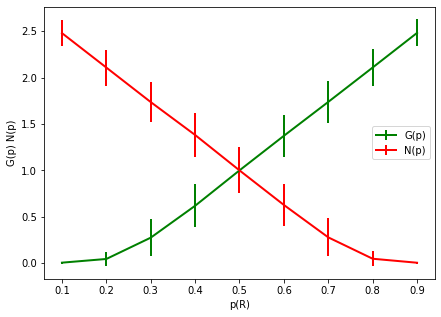

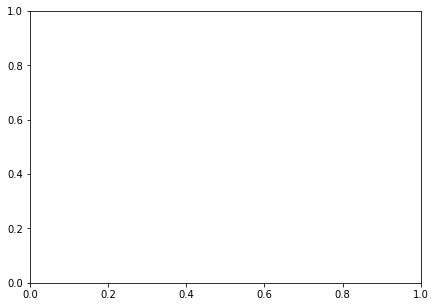

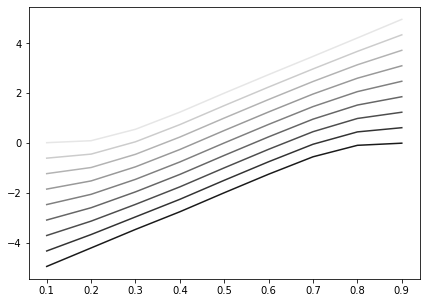

In [10]:
# SA CRITIC, NO MODULATION, NO NORM+ANNEAL
opal_01 = {}
prange = np.arange(0.,1.1,.1)  # ranges to plot
prange = np.arange(0.1,1.,.1)  # ranges to plot
for p in prange:
    this_env = "%d_10_1" %(p*100)
    print(this_env)
    opal_01[this_env] = learning.simulate(params,n_states,n_trials,v0=V0,r_mag=r_mag,l_mag=l_mag,crit="SA",env=this_env,mod="constant",rho=rho,norm=True,mag=mag,anneal=True,use_var=False,T=10,hebb=True)

# plot
fig, ax = plt.subplots(figsize=(7, 5))   # go actor evolution
fig1, ax1 = plt.subplots(figsize=(7, 5)) # rho1
fig2, ax2 = plt.subplots(figsize=(7, 5)) # rho2
axs = [ax1,ax2]
diagnosis.gna(opal_01,prange,100,0,ax,plot_act=True,axs=axs)

100
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


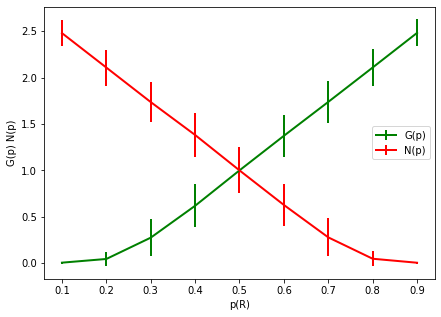

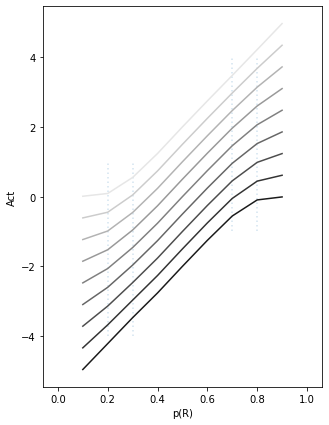

In [11]:
# Reformat

# matplotlib.rcParams['figure.dpi'] = 500
# plot
fig, ax = plt.subplots(figsize=(7, 5))   # go actor evolution
fig2, ax2 = plt.subplots(figsize=(5, 7)) # rho2
axs = [0,ax2]
prange = np.round(np.arange(0.1,0.91,.1),decimals=1)  # ranges to plot
diagnosis.gna(opal_01,prange,100,0,ax,plot_act=True,axs=axs)
# ax1.set_ylabel("Act")
# ax1.set_xlabel("p(R)")
ax2.set_ylabel("Act")
ax2.set_xlabel("p(R)")
ax2.margins(.2,.05)
# ax2.vlines([0.2,0.3,0.7,0.8],-13,13,linestyles='dashed',dashes=(0, (5,5)),linewidth=.3)
ax2.vlines([0.7,0.8],-1,4,linestyles='dashed',dashes=(0, (5,10)),linewidth=.3)
ax2.vlines([0.2,0.3],-4,1,linestyles='dashed',dashes=(0, (5,10)),linewidth=.3)
fig2.savefig('opalstar_actcurves.eps',format="eps",dpi=1200)

100
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


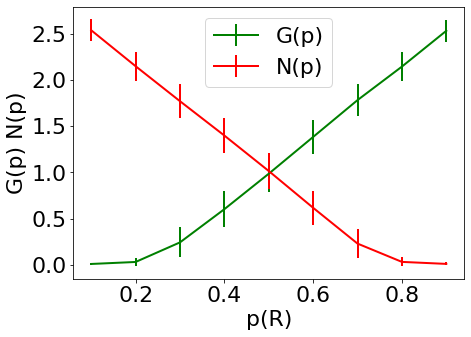

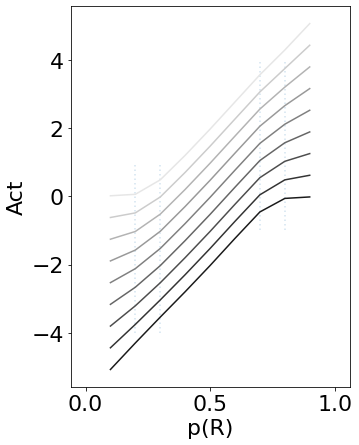

In [40]:
importlib.reload(diagnosis)
# matplotlib.rcParams['figure.dpi'] = 500
# plot
fig, ax = plt.subplots(figsize=(7, 5))   # go actor evolution
fig2, ax2 = plt.subplots(figsize=(5, 7)) # rho2
axs = [0,ax2]
prange = np.round(np.arange(0.1,0.91,.1),decimals=1)  # ranges to plot
diagnosis.gna(opal_01,prange,100,0,ax,plot_act=True,axs=axs)
# ax1.set_ylabel("Act")
# ax1.set_xlabel("p(R)")
ax2.set_ylabel("Act")
ax2.set_xlabel("p(R)")
ax2.margins(.2,.05)
# ax2.vlines([0.2,0.3,0.7,0.8],-13,13,linestyles='dashed',dashes=(0, (5,5)),linewidth=.3)
ax2.vlines([0.7,0.8],-1,4,linestyles='dashed',dashes=(0, (5,10)),linewidth=.3)
ax2.vlines([0.2,0.3],-4,1,linestyles='dashed',dashes=(0, (5,10)),linewidth=.3)
fig2.savefig('opalstar_actcurves.eps',format="eps",dpi=1200)

# 0/1 Environment Dynamics
These figures replicate Figure 3B

In [3]:
# initialize parameters

# optimized for no modulation (Bayes)
alpha_c = 0.1  # not actually used with Bayes mod
alpha_a = 0.5 #0.50 # arbitrary params
beta =  2.00 #1.0 #1.0
params = (alpha_c,alpha_a, beta)

n_states = 500
n_trials = 100
r_mag = 1
l_mag = 0
V0 = 0.5*r_mag + .5*l_mag
v0 = np.array([0.,0.]) #for bayes
rho = 0
phi = 1.0
T = 10 # annealing
k= 1
mag = r_mag - l_mag 

plt.rcParams.update({'font.size': 22})

0_10_1
10_10_1
20_10_1
30_10_1
40_10_1
50_10_1
60_10_1
70_10_1
80_10_1
90_10_1
100_10_1
0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
1.0


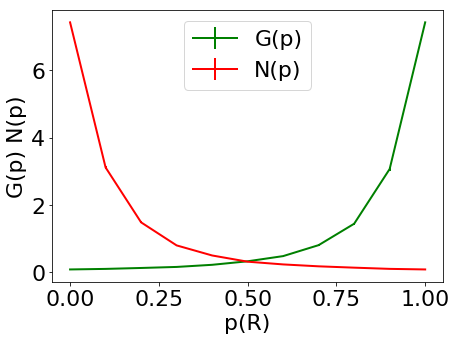

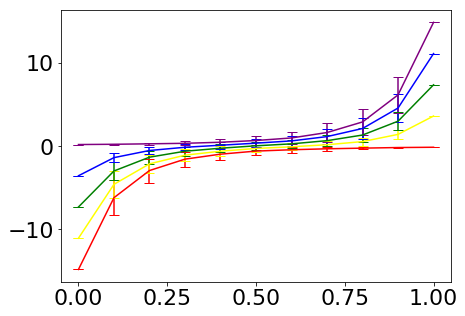

In [5]:
# FINAL FIGURE
# BAYESIAN CRITIC, BETA SA MODULATION, NORM+ANNEAL
opal_01_BB_NA = {}
prange = np.arange(0,1.1,.1)  # ranges to plot
for p in prange:
    this_env = "%d_10_1" %(p*100)
    print(this_env)
    opal_01_BB_NA[this_env] = learning.simulate(params,n_states,n_trials,v0=v0,crit="Bayes-SA",env=this_env,mod="beta",rho=rho,norm=True,mag=mag,anneal=True,T=T,phi=phi,k=k)

# plot
fig, ax = plt.subplots(figsize=(7, 5))   # go actor evolution
fig2, ax2 = plt.subplots(figsize=(7, 5)) # rho2
axs = [0,ax2]
diagnosis.gna(opal_01_BB_NA,prange,100,0,ax,plot_act=True,axs=axs)

100
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


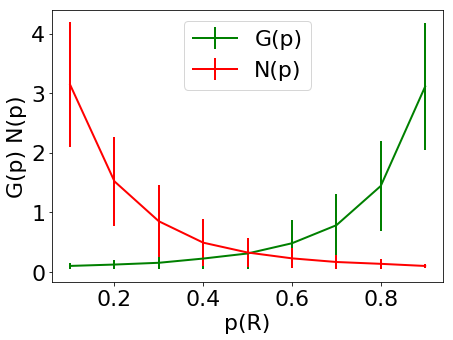

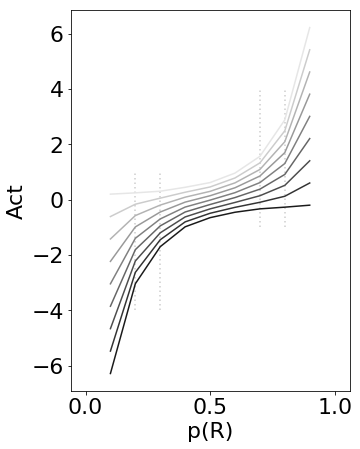

In [22]:
importlib.reload(diagnosis)
# matplotlib.rcParams['figure.dpi'] = 500
# plot
fig, ax = plt.subplots(figsize=(7, 5))   # go actor evolution
fig2, ax2 = plt.subplots(figsize=(5, 7)) # rho2
axs = [0,ax2]
prange = np.round(np.arange(0.1,0.91,.1),decimals=1)  # ranges to plot
diagnosis.gna(opal_01_BB_NA,prange,100,0,ax,plot_act=True,axs=axs)
# ax1.set_ylabel("Act")
# ax1.set_xlabel("p(R)")
ax2.set_ylabel("Act")
ax2.set_xlabel("p(R)")
ax2.margins(.2,.05)
# ax2.vlines([0.2,0.3,0.7,0.8],-13,13,linestyles='dashed',dashes=(0, (5,5)),linewidth=.3)
ax2.vlines([0.7,0.8],-1,4,linestyles='dashed',dashes=(0, (5,10)),linewidth=.3)
ax2.vlines([0.2,0.3],-4,1,linestyles='dashed',dashes=(0, (5,10)),linewidth=.3)
fig2.savefig('opalstar_actcurves.eps',format="eps",dpi=1200)

10_10_2
20_10_2
30_10_2
40_10_2
50_10_2
60_10_2
70_10_2
80_10_2
90_10_2
100_10_2
0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9
1.0


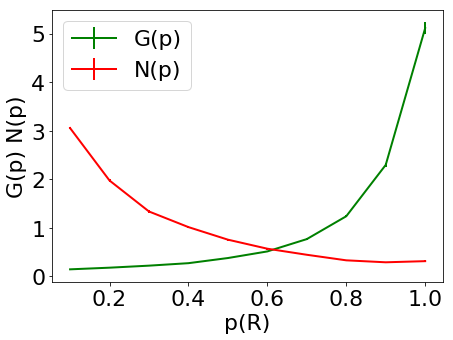

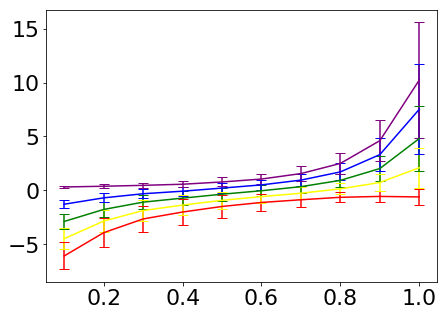

In [8]:
# BAYESIAN CRITIC, BETA SA MODULATION, NORM+ANNEAL, TWO-OPTIONS
opal_01_BB_NA_2 = {}
prange = np.arange(0.1,1.1,.1)  # ranges to plot
for p in prange:
    this_env = "%d_10_2" %(p*100)
    print(this_env)
    opal_01_BB_NA_2[this_env] = learning.simulate(params,n_states,n_trials,v0=v0,crit="Bayes-SA",env=this_env,mod="beta",rho=rho,norm=True,mag=mag,anneal=True,T=T,phi=phi,k=k)
# might need to update k for these simulations

# plots
fig, ax = plt.subplots(figsize=(7, 5))   # go actor evolution
fig2, ax2 = plt.subplots(figsize=(7, 5)) # rho2
axs = [0,ax2]
diagnosis.gna(opal_01_BB_NA_2,prange,100,0,ax,plot_act=True,axs=axs,noptions=2)

20
0.2
0.3
0.4
0.5
0.6
0.7
0.8


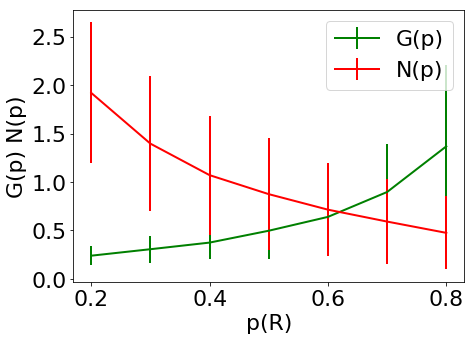

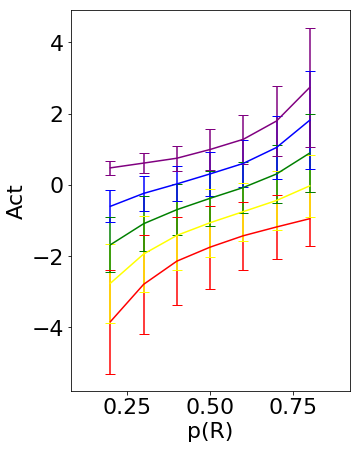

In [57]:
importlib.reload(diagnosis)
# plot
fig, ax = plt.subplots(figsize=(7, 5))   # go actor evolution
fig2, ax2 = plt.subplots(figsize=(5, 7)) # rho2
axs = [0,ax2]
prange = np.round(np.arange(0.2,.81,.1),decimals=1)  # ranges to plot
diagnosis.gna(opal_01_BB_NA_2,prange,20,0,ax,plot_act=True,axs=axs,noptions=2)
# ax1.set_ylabel("Act")
# ax1.set_xlabel("p(R)")
ax2.set_ylabel("Act")
ax2.set_xlabel("p(R)")
ax2.margins(.2,0.05)

# NO HEBB

0_10_1
10_10_1
20_10_1
30_10_1
40_10_1
50_10_1
60_10_1
70_10_1
80_10_1
90_10_1
100_10_1
0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
1.0


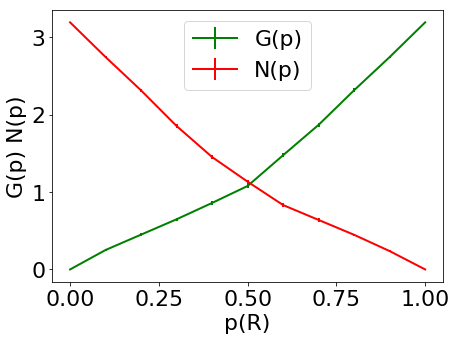

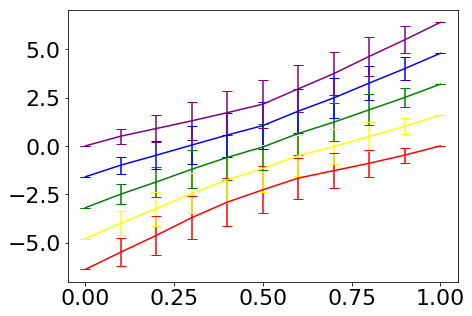

In [10]:
# FINAL FIGURE
# BAYESIAN CRITIC, BETA SA MODULATION, NORM+ANNEAL, NO HEBB
opal_01_BB_NA_HEBB = {}
prange = np.arange(0,1.1,.1)  # ranges to plot
for p in prange:
    this_env = "%d_10_1" %(p*100)
    print(this_env)
    opal_01_BB_NA_HEBB[this_env] = learning.simulate(params,n_states,n_trials,v0=v0,crit="Bayes-SA",env=this_env,mod="beta",rho=rho,norm=True,mag=mag,anneal=True,T=T,phi=phi,hebb=False,k=k)

# plot
fig, ax = plt.subplots(figsize=(7, 5))   # go actor evolution
fig2, ax2 = plt.subplots(figsize=(7, 5)) # rho2
axs = [0,ax2]
diagnosis.gna(opal_01_BB_NA_HEBB,prange,100,0,ax,plot_act=True,axs=axs)

100
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


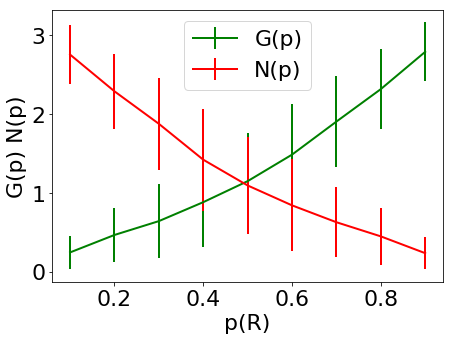

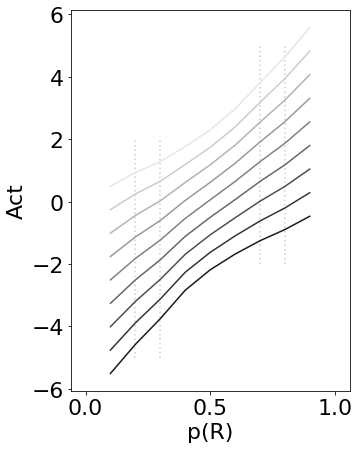

In [23]:
importlib.reload(diagnosis)
# plot
fig, ax = plt.subplots(figsize=(7, 5))   # go actor evolution
fig2, ax2 = plt.subplots(figsize=(5, 7)) # rho2
axs = [0,ax2]
prange = np.round(np.arange(0.1,0.91,.1),decimals=1)  # ranges to plot
diagnosis.gna(opal_01_BB_NA_HEBB,prange,100,0,ax,plot_act=True,axs=axs)
# ax1.set_ylabel("Act")
# ax1.set_xlabel("p(R)")
ax2.set_ylabel("Act")
ax2.set_xlabel("p(R)")
ax2.margins(.2,0.05)
# ax2.vlines([0.2,0.3,0.7,0.8],-13,13,linestyles='dashed',dashes=(0, (5,5)),linewidth=.3)
ax2.vlines([0.7,0.8],-2,5,linestyles='dashed',dashes=(0, (5,10)),linewidth=.3)
ax2.vlines([0.2,0.3],-5,2,linestyles='dashed',dashes=(0, (5,10)),linewidth=.3)
fig2.savefig('nohebb_actcurves.eps',format="eps",dpi=1200)

10_10_2
20_10_2
30_10_2
40_10_2
50_10_2
60_10_2
70_10_2
80_10_2
90_10_2
100_10_2
0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9
1.0


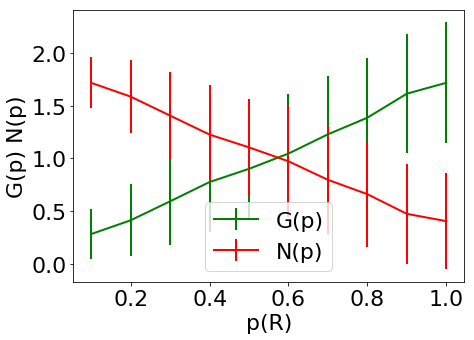

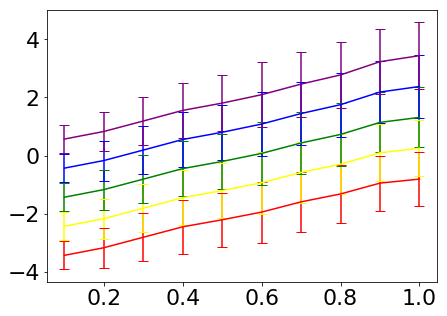

In [23]:
# FINAL FIGURE
# BAYESIAN CRITIC, BETA SA MODULATION, NORM+ANNEAL, NO HEBB, TWO-OPTIONS
opal_01_BB_NA_HEBB_2 = {}
prange = np.arange(0.1,1.1,.1)  # ranges to plot
for p in prange:
    this_env = "%d_10_2" %(p*100)
    print(this_env)
    opal_01_BB_NA_HEBB_2[this_env] = learning.simulate(params,n_states,n_trials,v0=v0,crit="Bayes-SA",env=this_env,mod="beta",rho=rho,norm=True,mag=mag,anneal=True,T=T,phi=phi,hebb=False,k=k)

# plot
fig, ax = plt.subplots(figsize=(7, 5))   # go actor evolution
fig2, ax2 = plt.subplots(figsize=(7, 5)) # rho2
axs = [0,ax2]
diagnosis.gna(opal_01_BB_NA_HEBB_2,prange,5,0,ax,plot_act=True,axs=axs,noptions=2)

20
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0


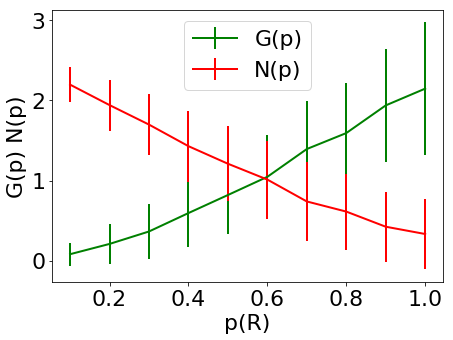

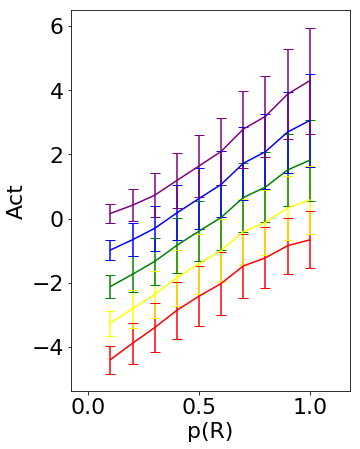

In [56]:
importlib.reload(diagnosis)
# plot
fig, ax = plt.subplots(figsize=(7, 5))   # go actor evolution
fig2, ax2 = plt.subplots(figsize=(5, 7)) # rho2
axs = [0,ax2]
prange = np.round(np.arange(0.1,1.01,.1),decimals=1)  # ranges to plot
diagnosis.gna(opal_01_BB_NA_HEBB_2,prange,20,0,ax,plot_act=True,axs=axs,noptions=2)
# ax1.set_ylabel("Act")
# ax1.set_xlabel("p(R)")
ax2.set_ylabel("Act")
ax2.set_xlabel("p(R)")
ax2.margins(.2,0.05)

In [4]:
# pickle.dump([opal_01_BB_NA, opal_01_BB_NA_HEBB, opal_01_BB_NA_2, opal_01_BB_NA_HEBB_2], open("mechanismcurves_k20.pkle","wb"))
# res = pickle.load(open("mechanismcurves.pkle","rb"))
# opal_01_BB_NA = res[0]
# opal_01_BB_NA_HEBB = res[1]

# Non-Bayesian Critic

0_10_1
10_10_1
20_10_1
30_10_1
40_10_1
50_10_1
60_10_1
70_10_1
80_10_1
90_10_1
100_10_1


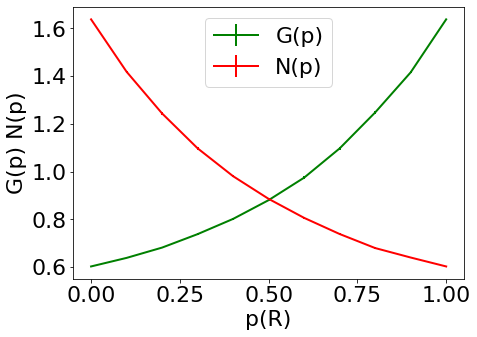

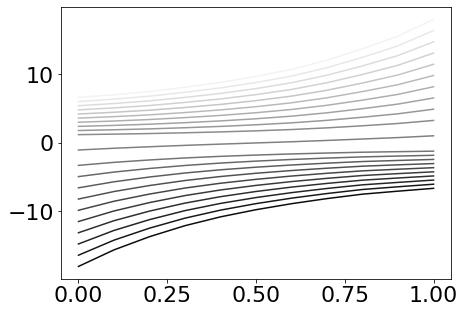

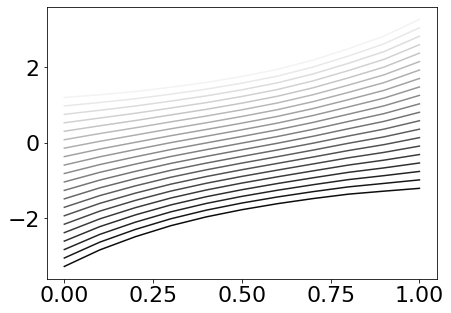

In [59]:
# SA CRITIC, NO MODULATION, NO NORM+ANNEAL
opal_01 = {}
prange = np.arange(0.,1.1,.1)  # ranges to plot
for p in prange:
    this_env = "%d_10_1" %(p*100)
    print(this_env)
    opal_01[this_env] = learning.simulate(params,n_states,n_trials,v0=v0,r_mag=r_mag,l_mag=l_mag,crit="SA",env=this_env,mod="constant",rho=rho,norm=False,anneal=False)

# plot
fig, ax = plt.subplots(figsize=(7, 5))   # go actor evolution
fig1, ax1 = plt.subplots(figsize=(7, 5)) # rho1
fig2, ax2 = plt.subplots(figsize=(7, 5)) # rho2
axs = [ax1,ax2]
diagnosis.gna(opal_01,prange,100,0,ax,plot_act=True,axs=axs)

0_10_1
10_10_1
20_10_1
30_10_1
40_10_1
50_10_1
60_10_1
70_10_1
80_10_1
90_10_1
100_10_1


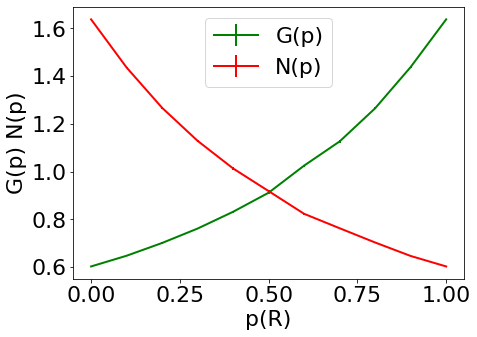

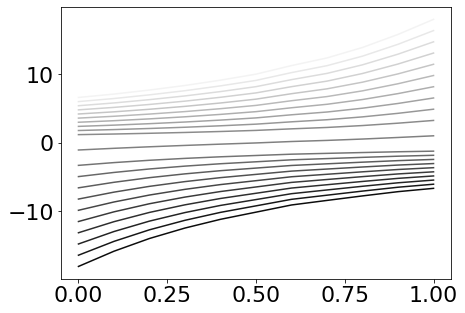

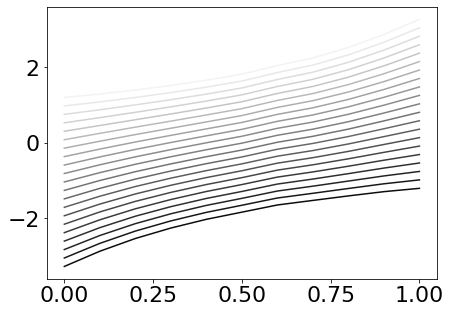

In [11]:
# SA CRITIC, NO MODULATION, NORM+ANNEAL
opal_01_NA = {}
prange = np.arange(0,1.1,.1)  # ranges to plot
for p in prange:
    this_env = "%d_10_1" %(p*100)
    print(this_env)
    opal_01_NA[this_env] = learning.simulate(params,n_states,n_trials,v0=v0,r_mag=r_mag,l_mag=l_mag,crit="SA",env=this_env,mod="constant",rho=rho,norm=True,mag=mag,anneal=True,T=T)

# plot
fig, ax = plt.subplots(figsize=(7, 5))   # go actor evolution
fig1, ax1 = plt.subplots(figsize=(7, 5)) # rho1
fig2, ax2 = plt.subplots(figsize=(7, 5)) # rho2
axs = [ax1,ax2]
diagnosis.gna(opal_01_NA,prange,100,0,ax,plot_act=True,axs=axs)

# No DA Mod

0_10_1
10_10_1
20_10_1
30_10_1
40_10_1
50_10_1
60_10_1
70_10_1
80_10_1
90_10_1
100_10_1


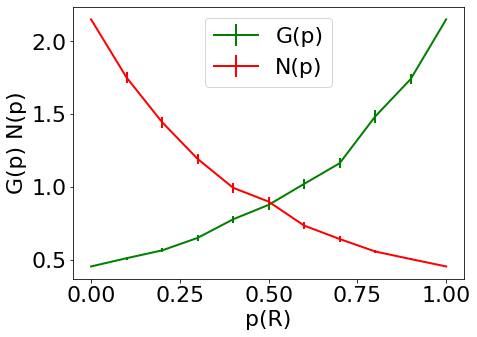

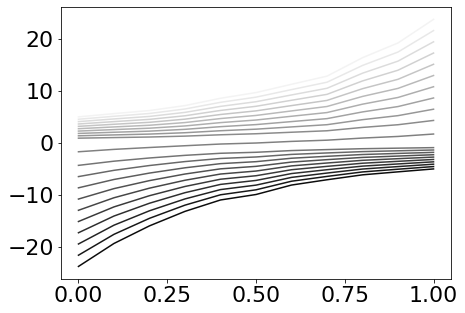

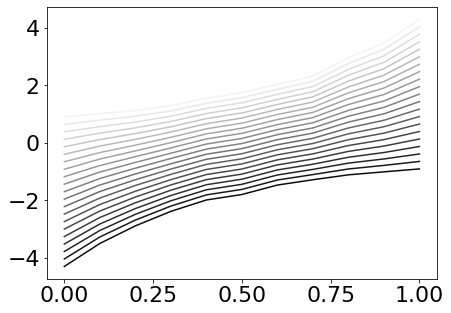

In [25]:
# BAYESIAN CRITIC, NO MODULATION (CONSTANT), NORM+ANNEAL
opal_01_BC_NA = {}
prange = np.arange(0,1.1,.1)  # ranges to plot
for p in prange:
    this_env = "%d_10_1" %(p*100)
    print(this_env)
    opal_01_BC_NA[this_env] = learning.simulate(params,n_states,n_trials,v0=v0,crit="Bayes",env=this_env,mod="constant",rho=rho,norm=True,mag=mag,anneal=True,T=T,use_std=True,phi=phi)

# plot
fig, ax = plt.subplots(figsize=(7, 5))   # go actor evolution
fig1, ax1 = plt.subplots(figsize=(7, 5)) # rho1
fig2, ax2 = plt.subplots(figsize=(7, 5)) # rho2
axs = [ax1,ax2]
diagnosis.gna(opal_01_BC_NA,prange,100,0,ax,plot_act=True,axs=axs)

# 1/-1 Environment Dynamics


In [27]:
# initialize parameters

# optimized for no modulation (Bayes)
alpha_c = 0.1  # not actually used with Bayes mod
alpha_a = 0.1 # arbitrary params
beta =  1. #1.0
params = (alpha_c,alpha_a, beta)

n_states = 500
n_trials = 250
r_mag = 1
l_mag = -1
v0 = 0.0
rho = 0
phi = 3
T = 250 # annealing
mag = r_mag - l_mag # normalization

plt.rcParams.update({'font.size': 22})

## Non-Bayesian critic

0_10_1
10_10_1
20_10_1
30_10_1
40_10_1
50_10_1
60_10_1
70_10_1
80_10_1
90_10_1
100_10_1


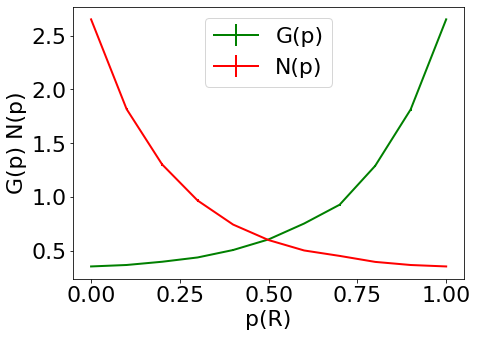

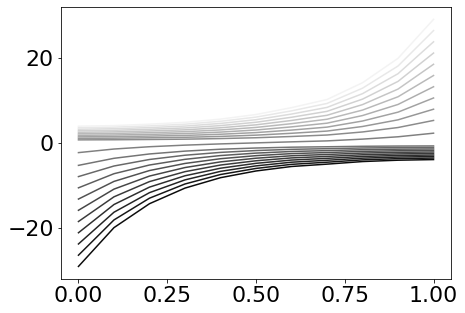

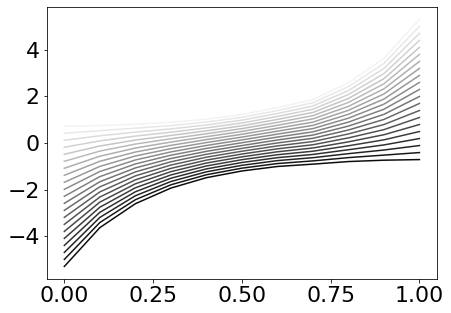

In [28]:
# SA CRITIC, NO MODULATION, NO NORM+ANNEAL
opal_11 = {}
prange = np.arange(0,1.1,.1)  # ranges to plot
for p in prange:
    this_env = "%d_10_1" %(p*100)
    print(this_env)
    opal_11[this_env] = learning.simulate(params,n_states,n_trials,v0=v0,r_mag=r_mag,l_mag=l_mag,crit="SA",env=this_env,mod="constant",rho=rho,norm=False,anneal=False)

# plot
fig, ax = plt.subplots(figsize=(7, 5))   # go actor evolution
fig1, ax1 = plt.subplots(figsize=(7, 5)) # rho1
fig2, ax2 = plt.subplots(figsize=(7, 5)) # rho2
axs = [ax1,ax2]
diagnosis.gna(opal_11,prange,100,0,ax,plot_act=True,axs=axs)

0_10_1
10_10_1
20_10_1
30_10_1
40_10_1
50_10_1
60_10_1
70_10_1
80_10_1
90_10_1
100_10_1


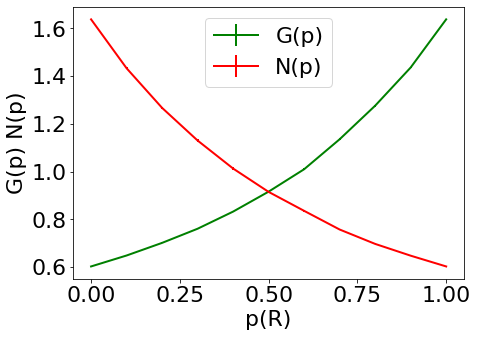

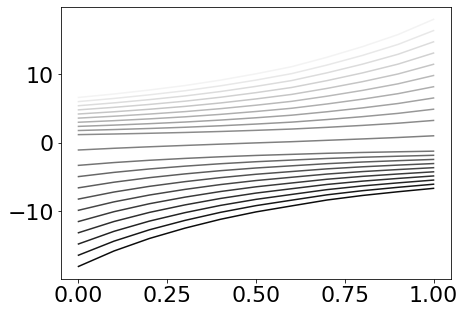

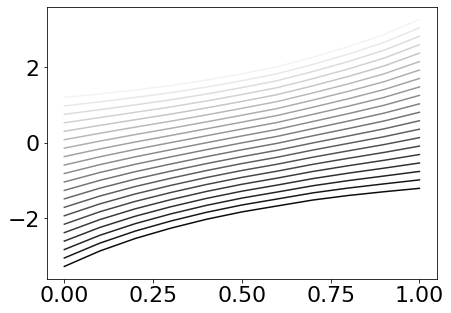

In [31]:
# SA CRITIC, NO MODULATION, NORM+ANNEAL
opal_11_NA = {}
prange = np.arange(0,1.1,.1)  # ranges to plot
for p in prange:
    this_env = "%d_10_1" %(p*100)
    print(this_env)
    opal_11_NA[this_env] = learning.simulate(params,n_states,n_trials,v0=v0,r_mag=r_mag,l_mag=l_mag,crit="SA",env=this_env,mod="constant",rho=rho,norm=True,mag=mag,anneal=True,T=T)

# plot
fig, ax = plt.subplots(figsize=(7, 5))   # go actor evolution
fig1, ax1 = plt.subplots(figsize=(7, 5)) # rho1
fig2, ax2 = plt.subplots(figsize=(7, 5)) # rho2
axs = [ax1,ax2]
diagnosis.gna(opal_11_NA,prange,100,0,ax,plot_act=True,axs=axs)

## Bayesian Critic

0_10_1
10_10_1
20_10_1
30_10_1
40_10_1
50_10_1
60_10_1
70_10_1
80_10_1
90_10_1
100_10_1


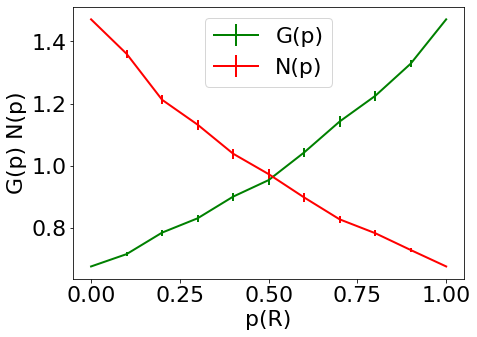

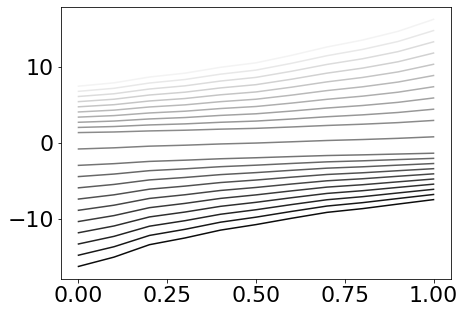

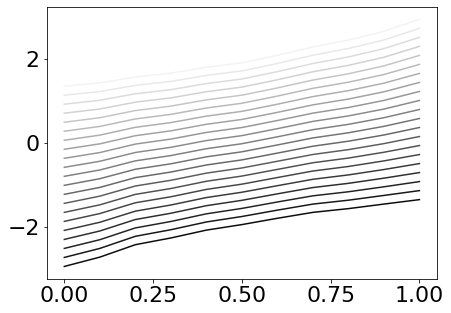

In [29]:
# BAYESIAN CRITIC, BETA MODULATION, NORM+ANNEAL
opal_11_BB_NA = {}
prange = np.arange(0,1.1,.1)  # ranges to plot
for p in prange:
    this_env = "%d_10_1" %(p*100)
    print(this_env)
    opal_11_BB_NA[this_env] = learning.simulate(params,n_states,n_trials,v0=v0,crit="Bayes",env=this_env,mod="beta",rho=rho,norm=True,mag=mag,anneal=True,T=T,use_std=True,phi=phi)

# plot
fig, ax = plt.subplots(figsize=(7, 5))   # go actor evolution
fig1, ax1 = plt.subplots(figsize=(7, 5)) # rho1
fig2, ax2 = plt.subplots(figsize=(7, 5)) # rho2
axs = [ax1,ax2]
diagnosis.gna(opal_11_BB_NA,prange,100,0,ax,plot_act=True,axs=axs)

0_10_1
10_10_1
20_10_1
30_10_1
40_10_1
50_10_1
60_10_1
70_10_1
80_10_1
90_10_1
100_10_1


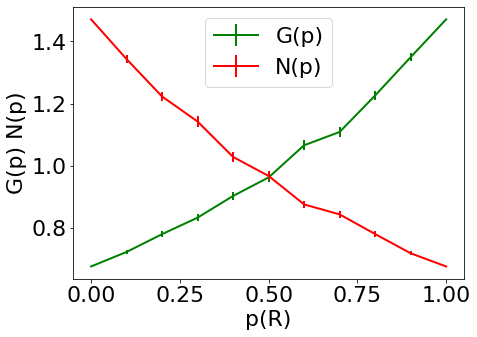

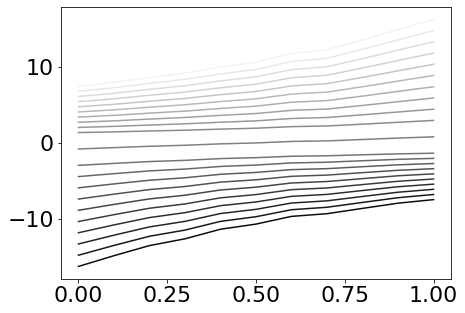

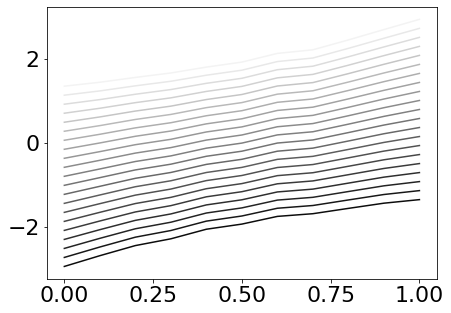

In [30]:
# BAYESIAN CRITIC, NO MODULATION (CONSTANT), NORM+ANNEAL
opal_11_BC_NA = {}
prange = np.arange(0,1.1,.1)  # ranges to plot
for p in prange:
    this_env = "%d_10_1" %(p*100)
    print(this_env)
    opal_11_BC_NA[this_env] = learning.simulate(params,n_states,n_trials,v0=v0,crit="Bayes",env=this_env,mod="constant",rho=rho,norm=True,mag=mag,anneal=True,T=T,use_std=True,phi=phi)

# plot
fig, ax = plt.subplots(figsize=(7, 5))   # go actor evolution
fig1, ax1 = plt.subplots(figsize=(7, 5)) # rho1
fig2, ax2 = plt.subplots(figsize=(7, 5)) # rho2
axs = [ax1,ax2]
diagnosis.gna(opal_11_BC_NA,prange,100,0,ax,plot_act=True,axs=axs)